In [29]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import json

# Functions

In [22]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn


def select_all_company(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM main.company")

    rows = cur.fetchall()
    return rows

def select_all_news_meta(conn):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM main.news_meta")

    rows = cur.fetchall()
    return rows

# Read data

In [24]:
database = '/Users/kleomeniskogias/DataspellProjects/Mycodes/9Fin/Data/db.sqlite3'
conn = create_connection(database)

In [ ]:
companies = select_all_company(conn)
news_meta = select_all_news_meta(conn)

In [ ]:
companies_df = pd.DataFrame(companies, columns = ['id', 'name', 'description', 'location', 'website'])
news_meta_df = pd.DataFrame(news_meta, columns = ['id', 'url', 'published_at', 'company_id', 'label'])

In [30]:
with open('/Users/kleomeniskogias/DataspellProjects/Mycodes/9Fin/Data/titles.jsonl', 'r') as json_file:
    json_list = list(json_file)

In [43]:
json_df = pd.DataFrame(columns = ['title', 'id'])
for json_str in json_list:
    result = json.loads(json_str)
    json_df = json_df.append(result, ignore_index=True)

/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  json_df = json_df.append(result, ignore_index=True)
/var/folders/k7/gq84mygx18v6xxlmhq1dbfzw0000gp/T/ipykernel_7856/1365047868.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [50]:
print(companies_df.shape, news_meta_df.shape, json_df.shape)

(561, 5) (859, 5) (859, 2)


# Companies

In [47]:
companies_df.head()

,id,name,description,location,website
0,2236,Diversified Healthcare Trust,Healthcare Real Estate Investment Trust,United States,https://www.dhcreit.com/home/default.aspx
1,2748,Nathan's Famous,Operates a chain of fast food restaurants,United States,https://www.nathansfamous.com/
2,663,Dufry,Travel retailer,Switzerland,http://www.dufry.com/
3,1169,Ocado Ltd.,Online supermarket,United Kingdom,https://www.ocado.com/
4,1924,Adler Group,Owns a portfolio of commercial and residential...,Germany,https://www.ado.properties/websites/ado/Englis...


In [67]:
# Info
print("------------ Info -------------")
print(companies_df.info())

# Missing values
print("------------ Missing values -------------")
for col in companies_df.columns:
    print(col)
    print(companies_df[companies_df[col] == ''].shape[0])

# Distribution of countries
print("------------ Location -------------")
print(companies_df['location'].value_counts())

# Check that each company is found once - however we might have the same company twice with slightly differentiated names
print("------------ Max Frequency of company names -------------")
print(companies_df['name'].value_counts().max())

id
0
name
0
description
0
location
2
website
1


In [ ]:
# Checks
# 1. That we do not have the same company twice, with slightly differentiated name
# 2. That we do not have any missing values

# News meta

In [51]:
news_meta_df.head()

,id,url,published_at,company_id,label
0,1b26de1d-0c7e-49c2-94d7-2db9d187aaed,https://www.dhcreit.com/news/press-release-det...,2021-04-08 12:01:45.346207,2236,CALENDAR
1,fdd95479-f76f-41e3-92f7-f9fcaa025931,https://nathansfamous.gcs-web.com/news-release...,2021-11-05 12:34:06.248918,2748,RESULTS
2,d3207342-6972-4ec9-97f3-a4c5e3511ecf,https://www.dufry.com/en/press_release/2021-06...,2021-06-10 05:04:55.296493,663,PRESS RELEASE
3,b3b6f4b8-1a67-4efe-af51-a43aed8dc1b2,http://www.londonstockexchange.com/exchange/ne...,2018-12-13 07:02:16.113445,1169,RESULTS
4,bc09685e-1b3a-4afa-b9c7-c210c35babbc,https://twitter.com/JackSidders/status/1456301...,2021-11-04 17:29:14.640525,1924,PRESS RELEASE


In [73]:
# Add new features
news_meta_df['published_at_month'] = news_meta_df['published_at'].apply(lambda x : x[0:7])

In [75]:
# Trendline of news publications
headlines_per_month  = news_meta_df.groupby(['published_at_month'])['id'].count().sort_values()
headlines_per_month.plot(figsize = (13,7))

# Merge data

In [119]:
# Add title to news_meta
print("news_meta_df shape: {}, companies_df shape: {}, json_df shape: {}".format(news_meta_df.shape, companies_df.shape,  json_df.shape))
news_meta_with_names = news_meta_df.merge(companies_df.rename(columns = {'id' : 'company_id'}), on = 'company_id', how = 'left')
print("news_meta_with_names shape: {}".format(news_meta_with_names.shape))
news_meta_with_names_and_titles = news_meta_with_names.merge(json_df, left_on = 'id',right_on = 'id')
print("news_meta_with_names_and_titles shape: {}".format(news_meta_with_names_and_titles.shape))

news_meta_df shape: (859, 6), companies_df shape: (561, 5), json_df shape: (859, 2)
news_meta_with_names shape: (859, 10)
news_meta_with_names_and_titles shape: (859, 11)


In [120]:
# Labels
news_meta_with_names_and_titles['label'].value_counts()

PRESS RELEASE    568
RESULTS          241
CALENDAR          50
Name: label, dtype: int64

In [106]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['label'] == 'CALENDAR'].to_clipboard()

In [98]:
news_meta_with_names_and_titles['month'] = news_meta_with_names_and_titles['published_at'].apply(lambda x : x[5:7])

## Labels distrbution per month

<AxesSubplot:xlabel='month'>

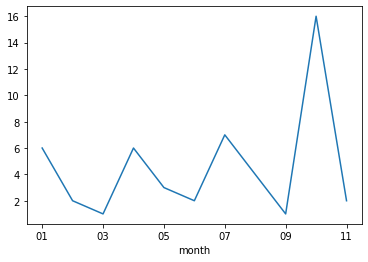

In [105]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['label'] == 'CALENDAR'].groupby(['month'])['id'].count().plot()

<AxesSubplot:xlabel='month'>

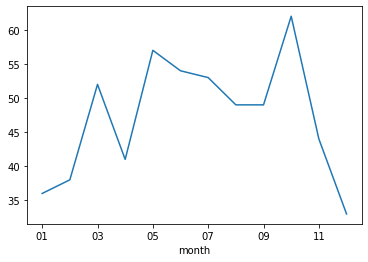

In [104]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['label'] == 'PRESS RELEASE'].groupby(['month'])['id'].count().plot()

<AxesSubplot:xlabel='month'>

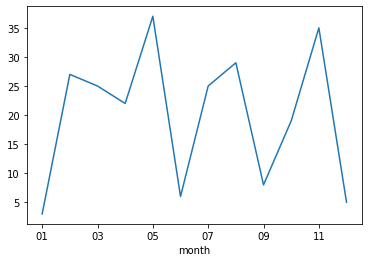

In [103]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['label'] == 'RESULTS'].groupby(['month'])['id'].count().plot()

In [90]:
news_meta_with_names_and_titles['name'].value_counts()

Wienerberger      9
Chemours          6
Faurecia          5
Dufry             5
Telecom Italia    5
                 ..
Adient            1
Grupo Antolin     1
Orano             1
William Hill      1
UPC               1
Name: name, Length: 561, dtype: int64

In [91]:
news_meta_with_names_and_titles

,id,url,published_at,company_id,label,published_at_month,name,description,location,website,title
0,1b26de1d-0c7e-49c2-94d7-2db9d187aaed,https://www.dhcreit.com/news/press-release-det...,2021-04-08 12:01:45.346207,2236,CALENDAR,2021-04,Diversified Healthcare Trust,Healthcare Real Estate Investment Trust,United States,https://www.dhcreit.com/home/default.aspx,Diversified Healthcare Trust: Diversified Heal...
1,fdd95479-f76f-41e3-92f7-f9fcaa025931,https://nathansfamous.gcs-web.com/news-release...,2021-11-05 12:34:06.248918,2748,RESULTS,2021-11,Nathan's Famous,Operates a chain of fast food restaurants,United States,https://www.nathansfamous.com/,"Nathan's Famous: Nathan's Famous, Inc. Reports..."
2,d3207342-6972-4ec9-97f3-a4c5e3511ecf,https://www.dufry.com/en/press_release/2021-06...,2021-06-10 05:04:55.296493,663,PRESS RELEASE,2021-06,Dufry,Travel retailer,Switzerland,http://www.dufry.com/,"Dufry: Dufry wins new, ten-year duty-free cont..."
3,b3b6f4b8-1a67-4efe-af51-a43aed8dc1b2,http://www.londonstockexchange.com/exchange/ne...,2018-12-13 07:02:16.113445,1169,RESULTS,2018-12,Ocado Ltd.,Online supermarket,United Kingdom,https://www.ocado.com/,Ocado: Trading Statement
4,bc09685e-1b3a-4afa-b9c7-c210c35babbc,https://twitter.com/JackSidders/status/1456301...,2021-11-04 17:29:14.640525,1924,PRESS RELEASE,2021-11,Adler Group,Owns a portfolio of commercial and residential...,Germany,https://www.ado.properties/websites/ado/Englis...,Adler Group: Major Adler shareholder Aggregate...
...,...,...,...,...,...,...,...,...,...,...,...
854,c483a136-a0c4-44dc-85cd-05f53f9fca83,https://www.hema.net/documents/780029/820856/P...,2020-08-28 06:03:23.382549,721,PRESS RELEASE,2020-08,HEMA,A general merchandise retailer,Netherlands,http://www.hemashop.com/,HEMA: HEMA opent online haar deuren in Mexico
855,6c9d8bff-c87e-4ef5-aec4-b21ee1415c6a,https://investor.salemmedia.com/news-events/pr...,2021-01-04 22:31:37.319608,2149,PRESS RELEASE,2021-01,Salem Media Group,"Radio broadcaster, internet content provider, ...",United States,https://salemmedia.com/,"Salem Media Group: Salem Media Group, Inc. Ann..."
856,c5ef2467-0ba5-494a-864c-19849e3f7198,https://www.arconic.com/global/en/investors/pd...,2021-11-02 10:49:20.620587,2545,RESULTS,2021-11,Arconic,"Provides aluminum sheets, plates, and other ex...",United States,https://www.arconic.com/,Arconic: 3Q21 Earnings Presentation (PDF)
857,1e103aca-5cc1-4edb-9f22-a613cead3ca6,https://www.businesswire.com/news/home/2019022...,2019-02-28 11:59:59.925613,932,RESULTS,2019-02,UPC,Broadband cable operator,Switzerland,https://www.upc.ch,"UPC: UPC Holding BV (“UPC Holding”), UPCB Fina..."


In [93]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['title'].str.lower().str.contains('quarter')]

,id,url,published_at,company_id,label,published_at_month,name,description,location,website,title
0,1b26de1d-0c7e-49c2-94d7-2db9d187aaed,https://www.dhcreit.com/news/press-release-det...,2021-04-08 12:01:45.346207,2236,CALENDAR,2021-04,Diversified Healthcare Trust,Healthcare Real Estate Investment Trust,United States,https://www.dhcreit.com/home/default.aspx,Diversified Healthcare Trust: Diversified Heal...
1,fdd95479-f76f-41e3-92f7-f9fcaa025931,https://nathansfamous.gcs-web.com/news-release...,2021-11-05 12:34:06.248918,2748,RESULTS,2021-11,Nathan's Famous,Operates a chain of fast food restaurants,United States,https://www.nathansfamous.com/,"Nathan's Famous: Nathan's Famous, Inc. Reports..."
15,573c54ad-4556-4af4-90b7-d9c8a96de11c,https://www.cosmote.gr/otegroup_company/invest...,2019-11-07 09:05:18.647073,719,RESULTS,2019-11,Hellenic Telecommunications Organization,Telecommunications provider,Greece,http://ote.gr,Hellenic Telecommunications Organization: OTE ...
20,517a1c1b-5a8a-40e4-a894-11675f07e89f,https://ir.compassdiversified.com/news/news-de...,2021-04-15 20:17:43.439341,2714,CALENDAR,2021-04,Compass Diversified,Investment holding company in small to middle ...,United States,https://compassdiversified.com/,Compass Diversified: Compass Diversified Annou...
43,2e32677e-1d08-4e71-83d5-8c634817e0e1,https://www.burlingtoninvestors.com/events/eve...,2021-02-18 21:23:27.445213,2526,RESULTS,2021-02,Burlington Stores,Department store retailer,United States,https://www.burlington.com/,Burlington Stores: Fourth Quarter 2020 Earning...
...,...,...,...,...,...,...,...,...,...,...,...
822,3faab667-64b0-4a75-b6af-616406dc985e,https://www.dufry.com/en/press_release/2019-05...,2019-05-14 04:50:13.096582,663,RESULTS,2019-05,Dufry,Travel retailer,Switzerland,http://www.dufry.com/,Dufry: Dufry starts positively and accelerates...
825,95108489-29ec-4d34-b019-686c3b1452b3,https://www.prnewswire.com:443/news-releases/s...,2021-10-15 08:29:52.716195,2235,CALENDAR,2021-10,Select Medical,Healthcare company providing long term acute c...,United States,https://www.selectmedical.com/,Select Medical: Select Medical Holdings Corpor...
831,ce23826f-997e-45c9-91a6-8ff6fa495254,https://www.parpacific.com/press-releases/par-...,2021-10-14 09:01:46.864103,1659,CALENDAR,2021-10,Par Pacific,Owns and operates oil and gas refineries,United States,http://parpacific.com/,Par Pacific: Par Pacific Announces Third Quart...
843,884d8623-4777-4e34-9876-ad200cb2b3af,https://ir.hc2.com/news-releases/news-release-...,2021-05-07 11:03:04.969884,2100,RESULTS,2021-05,HC2 Holdings,"Diversified holding company, which seeks oppor...",United States,https://hc2.com/,HC2 Holdings: HC2 Holdings Reports First Quart...


In [94]:
news_meta_with_names_and_titles[news_meta_with_names_and_titles['title'].str.lower().str.contains('release')]

,id,url,published_at,company_id,label,published_at_month,name,description,location,website,title
22,a5891516-6c0e-47ef-94db-3fcf7b1add5e,https://www.prnewswire.com:443/news-releases/t...,2020-11-06 08:28:03.847308,2564,PRESS RELEASE,2020-11,Tripadvisor,Diversified online platform for the travel sec...,United States,https://www.tripadvisor.com/,"Tripadvisor: Tripadvisor, Inc. Earnings Press ..."
66,b6416237-672d-436d-b270-963a416ad2bd,https://www.cabotcm.com/umbraco/Surface/Report...,2020-08-06 07:09:04.104547,631,RESULTS,2020-08,Cabot Financial,Acquirer and manager of defaulted consumer debt,United Kingdom,https://www.cabotfinancial.co.uk/,Cabot Financial: Q2 2020 Press Release
81,75f416df-7313-4874-9d07-188e1015272a,https://investors.garrettmotion.com/file/Index...,2020-05-11 11:07:42.520523,1288,PRESS RELEASE,2020-05,Garrett,Automotive technology,United States,https://www.garrettmotion.com/,Garrett: Press Release - Garrett Motion Inc.
92,5c87feca-ee27-4373-b0ac-29dc51fe96ce,https://www.devonenergy.com/news/2021/Devon-En...,2021-06-24 14:17:44.053479,2323,PRESS RELEASE,2021-06,WPX Energy,Oil and natural gas exploration and production...,United States,https://www.wpxenergy.com/,WPX Energy: Devon Energy Schedules Second-Quar...
111,40707f26-9e6b-4377-a81a-08dede1b686b,https://www.vallourec.com/-/media/Corporate_We...,2020-04-23 06:16:47.65439,1198,PRESS RELEASE,2020-04,Vallourec,Tubular solutions for the energy markets,France,http://www.vallourec.com,Vallourec: Press Release 2020
133,9df35117-471e-486d-804a-8dc196a3b742,http://investors.qtsdatacenters.com/2021-01-14...,2021-01-14 14:01:37.761521,1975,CALENDAR,2021-01,Qualitytech,Provider of data centre facilities,United States,www.qtsdatacenters.com,"Qualitytech: QTS Realty Trust, Inc. Schedules ..."
150,1827f971-50db-4834-be06-3e697780b34e,http://investor.ssctech.com/investor-relations...,2020-10-08 21:02:08.451908,2300,CALENDAR,2020-10,SS&C Technologies,Multinational financial technology company,United States,https://www.ssctech.com/,SS&C Technologies: SS&C to Release Third Quart...
161,15c6f0a1-dc81-4eef-a643-f3e0963040b0,http://ir.nordex-online.com/websites/Nordex/En...,2021-02-10 06:31:44.476039,1219,PRESS RELEASE,2021-02,Nordex,"Designs, sells and manufactures wind turbines",Germany,http://www.nordex-online.com/en,Nordex: Nordex SE: Release according to Articl...
162,01daaa97-6ba7-46f4-bbfb-d06653c4b2df,http://irpages2.equitystory.com/download/compa...,2019-05-09 07:05:53.289396,660,CALENDAR,2019-05,Douglas GmbH,Beauty retailer,Germany,https://www.douglas.de/,Douglas: Release of results
169,edf37ae0-ebe9-4d32-b2c7-72eeaa1473d0,https://ir.commscope.com/news-releases/news-re...,2021-07-15 20:31:54.490191,2463,CALENDAR,2021-07,CommScope,"Designs, builds, and manages wired and wireles...",United States,https://www.commscope.com/,CommScope: CommScope to Release Second Quarter...


# Modelling

Case 1:
- clean open text (optional)
- estimate TF-IDF per title (I can add info from the URLs) as well
- train  a model with TF-IDF and month

Case 2:
- fine-tune BERT model


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
list(news_meta_with_names_and_titles['title'])

['Diversified Healthcare Trust: Diversified Healthcare Trust First Quarter 2021 Conference Call Scheduled for Thursday, May 6th',
 "Nathan's Famous: Nathan's Famous, Inc. Reports Second Quarter Results",
 'Dufry: Dufry wins new, ten-year duty-free contract at Martinique International Airport',
 'Ocado: Trading Statement',
 'Adler Group: Major Adler shareholder Aggregate has been pitching distressed debt funds as it seeks new financing (Twitter)',
 'Preem: Lina Stolpe appointed new CFO in Preem',
 'GEO Group: Shareholder Alert: Robbins LLP is Investigating The GEO Group, Inc. (GEO) for Shareholders',
 'Together: Together Financial Services Q1 Results',
 'Scientific Games: Scientific Games Celebrates Instant Game Production Expansion To Serve UK, European And International Lotteries',
 'ASGN Incorporated: ECS Awarded $28.8 Million USMC IT Service and Support Contract',
 'B&G Foods: B&G Foods Selects Kenneth C. “Casey” Keller as its Next President and CEO',
 'Sallie Mae: Sallie Mae Offers

In [ ]:
# Corpus cleaning
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

In [ ]:
# load data
filename = 'metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()
# split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

In [115]:
# Apply TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(list(news_meta_with_names_and_titles['title']))
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

/Users/kleomeniskogias/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
df

,00,000,000036,0001584509,004,005m,00pm,01,02,03,...,zappos,zayo,zealand,zero,zf,zoopla,zorgverzekering,zurich,zurück,οrganisation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
